In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### Setting up the dataframe ###
Keeping the records where 'ocean_proximity' is '<1H OCEAN' or 'INLAND'
and using only the subset with the columns 


'latitude', <br>
'longitude', <br>
'housing_median_age', <br>
'total_rooms', <br>
'total_bedrooms', <br>
'population', <br>
'households', <br>
'median_income', <br>
'median_house_value' <br>

In [47]:
housing_df = pd.read_csv("../data/housing_1.csv")

In [48]:
filter_housing_df = housing_df[['latitude', 
'longitude', 
'housing_median_age', 
'total_rooms', 
'total_bedrooms', 
'population', 
'households', 
'median_income', 
'median_house_value']][(housing_df['ocean_proximity'] == 'ISLAND') | (housing_df['ocean_proximity'] == '<1H OCEAN')]

## Question 1 ##
### Find the feature that has missing values ###

In [49]:
filter_housing_df.columns[filter_housing_df.isna().any()][0]

'total_bedrooms'

## Question 2 ##

### What's the median (50% percentile) for variable 'population'? ###

In [52]:
filter_housing_df['population'].median(axis=0, skipna=True)

1247.0

In [61]:
filter_housing_df['population'].quantile(0.5)

1247.0

## Prepare and split the dataset ##

Shuffle the dataset (the filtered one you created above), use seed 42. <br>
Split your data in train/val/test sets, with 60%/20%/20% distribution. <br>
Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [62]:
number_in_dataset = len(filter_housing_df)

In [123]:
number_in_dataset_validation = int(0.2 * number_in_dataset)
number_in_dataset_test = int(0.2 * number_in_dataset)
number_in_dataset_train = number_in_dataset - number_in_dataset_validation - number_in_dataset_test

In [124]:
np.random.seed(42)

In [125]:
id_shuffle = np.arange(number_in_dataset)
np.random.shuffle(id_shuffle)
filter_housing_df_shuffle = filter_housing_df.iloc[id_shuffle]

In [126]:
df_train = filter_housing_df_shuffle.iloc[:number_in_dataset_train].copy()
df_validation = filter_housing_df_shuffle.iloc[number_in_dataset_train:number_in_dataset_train+number_in_dataset_validation].copy()
df_test = filter_housing_df_shuffle.iloc[number_in_dataset_train+number_in_dataset_validation:].copy()

In [127]:
log_median_house_value = np.log1p(filter_housing_df['median_house_value'].values)

/Volumes/_Data/School_Folder/machine_learning_zoomcamp/ml_zoom/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Volumes/_Data/School_Folder/machine_learning_zoomcamp/ml_zoom/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

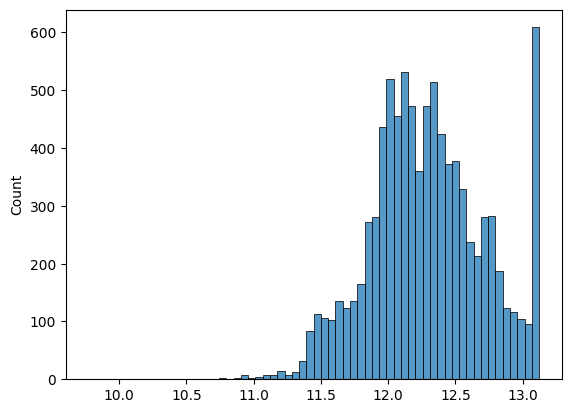

In [128]:
sns.histplot(log_median_house_value)

In [129]:
y_train = np.log1p(df_train['median_house_value'].values)
y_validation = np.log1p(df_validation['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)

## Question 3 ##

### 
We need to deal with missing values for the column from Q1. <br>
We have two options: fill it with 0 or with the mean of this variable.<br>
Try both options. For each, train a linear regression model without regularization using the code from the lessons.<br>
For computing the mean, use the training only!<br>
Use the validation dataset to evaluate the models and compare the RMSE of each option.<br>
Round the RMSE scores to 2 decimal digits using round(score, 2)<br>
Which option gives better RMSE?<br>
###

In [82]:
def linear_regression(xi):
    n = len(xi)
    pred = w0
    for i in range(n):
        pred = pred + w[i] * xi[i]

    return pred

### Create the training linear model ###

In [87]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [83]:
def rmse(y, y_pred):
    error = y_pred -y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [89]:
base = filter_housing_df.columns

In [130]:
df_num = df_train[base]

In [131]:
df_num_filzero = df_num.fillna(0).copy()

In [132]:
df_num_mean = df_num.fillna(df_train['total_bedrooms'].mean(axis=0, skipna=True)).copy()

### Using the fill 0 ###

In [133]:
X_filzero_tain = df_num_filzero.values

In [134]:
w_0, w = train_linear_regression(X_filzero_tain, y_train)

In [135]:
y_pred = w_0 + X_filzero_tain.dot(w)

/Volumes/_Data/School_Folder/machine_learning_zoomcamp/ml_zoom/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Volumes/_Data/School_Folder/machine_learning_zoomcamp/ml_zoom/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Volumes/_Data/School_Folder/machine_learning_zoomcamp/ml_zoom/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Volumes/_Data/School_Folder/machine_learning_zoomcamp/ml_zoom/lib/python3.

Text(0.5, 1.0, 'Fill missing values with 0')

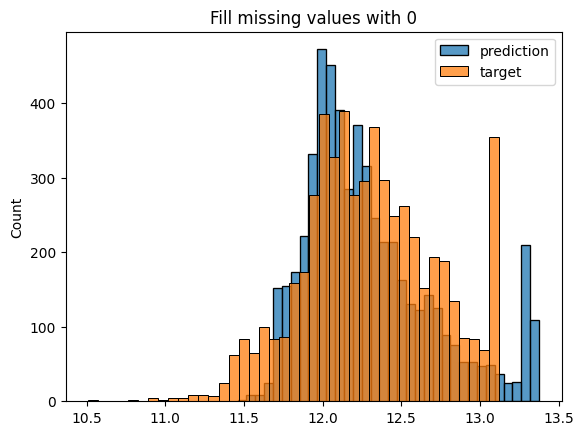

In [136]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='target')
plt.legend()
plt.title('Fill missing values with 0')

In [137]:
rmse(y_train, y_pred)

0.10725644209943652

### Evaluating the model ###

In [138]:
def prepare_X_filzero(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

def prepare_X_filmean(df):
    df_num = df[base]
    df_num = df_num.fillna(df_train['total_bedrooms'].mean(axis=0, skipna=True))
    X = df_num.values
    return X

X_train = prepare_X_filzero(df_train)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X_filzero(df_validation)
y_pred = w_0 + X_val.dot(w)
print('validation for fill zero:', round(rmse(y_validation, y_pred),2))

validation for fill zero: 0.11


In [139]:

X_val = prepare_X_filmean(df_validation)
y_pred = w_0 + X_val.dot(w)
print('validation for fill mean:', round(rmse(y_validation, y_pred),2))

validation for fill mean: 0.11


## Question 4 ##

Now let's train a regularized linear regression. <br>
For this question, fill the NAs with 0.<br>
Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].<br>
Use RMSE to evaluate the model on the validation dataset.<br>
Round the RMSE scores to 2 decimal digits.<br>
Which r gives the best RMSE?<br>

In [119]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [140]:

X_train = prepare_X_filzero(df_train)
X_val = prepare_X_filzero(df_validation)
r = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

for i in r:
    
    w_0, w = train_linear_regression_reg(X_train, y_train, i)
    y_pred = w_0 + X_val.dot(w)
    print(f'validation for fill zero with r value {i}: {rmse(y_validation, y_pred)}' )

validation for fill zero with r value 0: 0.10854305436367322
validation for fill zero with r value 1e-06: 0.10854304702417772
validation for fill zero with r value 0.0001: 0.10854233688360575
validation for fill zero with r value 0.001: 0.10853725286645659
validation for fill zero with r value 0.01: 0.10858729052883132
validation for fill zero with r value 0.1: 0.11030098410744077
validation for fill zero with r value 1: 0.11270743256096856
validation for fill zero with r value 5: 0.11311902858665976
validation for fill zero with r value 10: 0.11317047722932753


## Question 5 ##

We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.<br>
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].<br>
For each seed, do the train/validation/test split with 60%/20%/20% distribution.<br>
Fill the missing values with 0 and train a model without regularization.<br>
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.<br>
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.<br>
Round the result to 3 decimal digits (round(std, 3))<br>

In [153]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []
for seed in seeds:
    np.random.seed(seed)
    id_shuffle = np.arange(number_in_dataset)
    np.random.shuffle(id_shuffle)
    filter_housing_df_shuffle = filter_housing_df.iloc[id_shuffle]
    df_train = filter_housing_df_shuffle.iloc[:number_in_dataset_train].copy()
    df_validation = filter_housing_df_shuffle.iloc[number_in_dataset_train:number_in_dataset_train+number_in_dataset_validation].copy()
    df_test = filter_housing_df_shuffle.iloc[number_in_dataset_train+number_in_dataset_validation:].copy()

    y_train = np.log1p(df_train['median_house_value'].values)
    y_validation = np.log1p(df_validation['median_house_value'].values)
    y_test = np.log1p(df_test['median_house_value'].values)
    
    X_train = prepare_X_filzero(df_train)
    w_0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X_filzero(df_validation)
    y_pred = w_0 + X_val.dot(w)
    scores.append(rmse(y_validation, y_pred))
    print(f'evaluation for seed {seed}:', round(rmse(y_validation, y_pred),2))

evaluation for seed 0: 0.1
evaluation for seed 1: 0.11
evaluation for seed 2: 0.11
evaluation for seed 3: 0.11
evaluation for seed 4: 0.11
evaluation for seed 5: 0.11
evaluation for seed 6: 0.11
evaluation for seed 7: 0.11
evaluation for seed 8: 0.11
evaluation for seed 9: 0.1


In [154]:
round(np.std(scores),5)

0.00293

## Question 6 ##

Split the dataset like previously, use seed 9.<br>
Combine train and validation datasets.<br>
Fill the missing values with 0 and train a model with r=0.001.<br>
What's the RMSE on the test dataset?<br>

In [160]:
number_in_dataset_validation = int(0.2 * number_in_dataset)
number_in_dataset_test = int(0.2 * number_in_dataset)
number_in_dataset_train = number_in_dataset  - number_in_dataset_test

In [162]:
np.random.seed(9)
id_shuffle = np.arange(number_in_dataset)
np.random.shuffle(id_shuffle)
filter_housing_df_shuffle = filter_housing_df.iloc[id_shuffle]
df_train = filter_housing_df_shuffle.iloc[:number_in_dataset_train].copy()
df_validation = filter_housing_df_shuffle.iloc[number_in_dataset_train:number_in_dataset_train+number_in_dataset_validation].copy()
df_test = filter_housing_df_shuffle.iloc[number_in_dataset_train+number_in_dataset_validation:].copy()



y_train = np.log1p(df_train['median_house_value'].values)
y_validation = np.log1p(df_validation['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)

X_train = prepare_X_filzero(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, 0.001)

X_val = prepare_X_filzero(df_validation)
y_pred = w_0 + X_val.dot(w)

print(f'evaluation for seed 9 with train data plus validation data:', round(rmse(y_validation, y_pred),3))

evaluation for seed 9 with train data plus validation data: 0.113
